## 3.5.2 병합군집(agglomerative clustering)

In [3]:
import mglearn
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

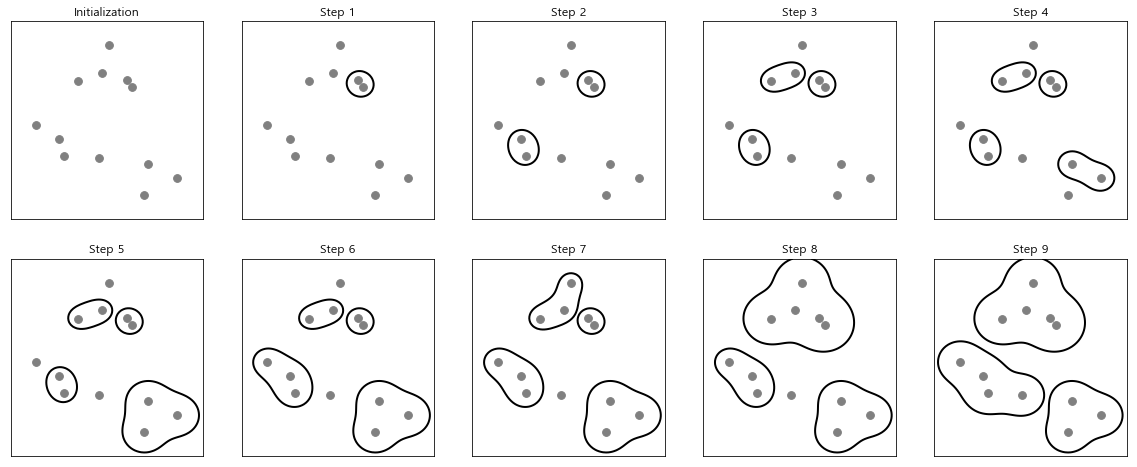

In [4]:
mglearn.plots.plot_agglomerative_algorithm()

### 알고리즘 설명
<pre>
최초 많은 클러스터에서 원하는 종료조건의 클러스터까지 이르게 되면 알고리즘은 멈춘다.

(1) 최초 각 포인터가 하나의 클러스터이다.
(2) 각 단계에서 가장 가까운 두 클러스터가 합쳐진다.
(3) Step4 까지 하나뿐인 클러스터가 합쳐져 데이터가 2개인 클러스터만 된다.
(4) Step5 에서는 두 개의 포인트를 가진 클러스터 중 하나가 세 개의 포인트로 확장된다.
(5) 이렇게 Step 9까지 이르게 되고 클러스터가 세 개가 되고 이 알고리즘은 멈추게 된다.
</pre>
#### 두 군집사이의 거리 계산
<pre>
scikit-learn에 구현된 옵션은 아래와 같다.
ward : 기본값이 ward 연결(linkage) - 모든 클러스터의 분산을 가장 작게 증가시킨다.
average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.
complete : 최대 연결-클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합치기
</pre>
#### 위의 내용 포함  다른 거리 개념
<img src="img/agglo01.png">


### 그렇다면 언제 ward를 쓰고 기타 거리 개념을 사용할까?
<pre>
대부분의 경우는 ward를 쓰고,
클러스터의 속한 포인터의 수가 많이 다를 땐 average나 complete가 더 나을 수 있다.
</pre>

### 계층적 군집의 경우, 새로운 포인트에 대한 예측이 가능한가?
...
<pre>
훈련 세트로 모델을 만들고 클러스터 소속 정보를 얻기 위해 fit_predict 메서드를 사용
</pre>

### Practice(실습)
<pre>
[사용 클래스]
sklearn.cluster.AgglomerativeClusering 

(1) 메서드를 이용하여 객체 생성
(2) fit_predict()를 이용 데이터에 대한 소속 정보 생성
(3) 그래프로 확인하기
</pre>

(100, 2) (100,)
[[ -9.15155186  -4.81286449]
 [-11.44182631  -4.45781441]
 [ -9.76761777  -3.19133737]
 [ -4.53655648  -8.40186288]] [1 1 1 2]
(100,)
(100,)


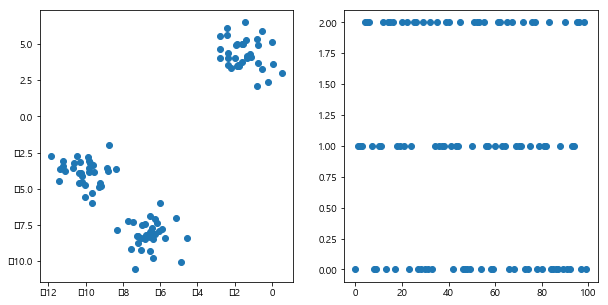

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

# 데이터 확인
print(X.shape, y.shape)
print(X[1:5], y[1:5])
print(X[:,0].shape)
print(X[:,1].shape)

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(X[:,0],X[:,1], "o")
axes[1].plot(y, "o")

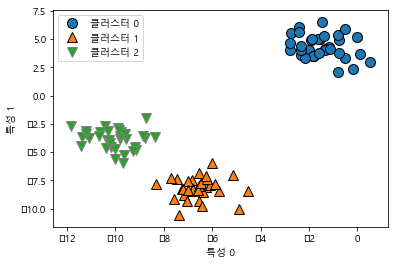

In [31]:
agg = AgglomerativeClustering(n_clusters=3)  # 3개의 클러스터 할당
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 5개의 클러스터를 만들어보자.

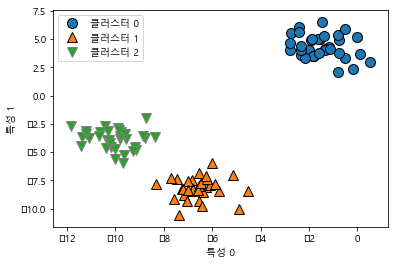

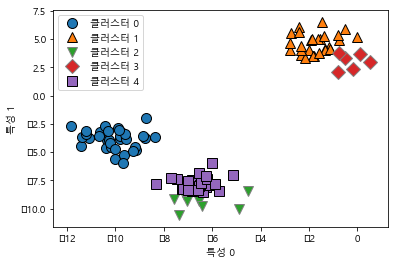

In [40]:
agg1 = AgglomerativeClustering(n_clusters=3)  # 3개의 클러스터 할당
assignment1 = agg1.fit_predict(X)

agg2 = AgglomerativeClustering(n_clusters=5)  # 3개의 클러스터 할당
assignment2 = agg2.fit_predict(X)


mglearn.discrete_scatter(X[:,0], X[:,1], assignment1)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

mglearn.discrete_scatter(X[:,0], X[:,1], assignment2)
plt.legend(["클러스터 0", "클러스터 1", 
            "클러스터 2", "클러스터 3",
           "클러스터 4"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()


## Summary
<pre>
(가) 병합 군집은 계층적 군집(hierarchical clustering)를 만든다.
(나) 단계별로 클러스터가 생성되면서 클러스터 안에 데이터 포인트 수가 달라진다.
</pre>

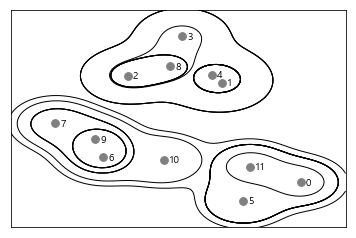

In [42]:
mglearn.plots.plot_agglomerative()

In [ ]:
### 기타 알아보기
### 시각화 도구 : 3차원 이상의 데이터 시각화 (덴드로 그램-dendrogram)- 현재 scikit learn에서 제공하지 않음.